This Project Made By:
> * <strong>Amirhasan Allahdadi</strong> : 9713302
* <strong>Negar Kabiri </strong>: 9913056
* <strong>Nava Biglar </strong>: 9913034


# 1- Loading Dataset
در گام اول ابتدا دیتاست را بارگذاری کرده و ایمپورت میکنیم

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Adult_TrainDataset.csv")

# Find columns with null values
null_columns = df.columns[df.isnull().any()]

# Display columns with null values
print("Columns with null values:")
print(null_columns)

# Delete columns with null values
df.drop(null_columns, axis=1, inplace=True)
# Remove final weight column since there is no use for it during the classification.
df = df.drop('Final_Weight', axis=1)

# Verify the updated dataset
print("Updated dataset:")
print(df.head())

Columns with null values:
Index([], dtype='object')
Updated dataset:
   Age        Work_Class  Education  Education-Number      Marital_Status  \
0   39         State-gov  Bachelors                13       Never-married   
1   50  Self-emp-not-inc  Bachelors                13  Married-civ-spouse   
2   38           Private    HS-grad                 9            Divorced   
3   53           Private       11th                 7  Married-civ-spouse   
4   28           Private  Bachelors                13  Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Capital_Gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   Capital_Loss  Hours-Per-Week Native_Country Income  
0  

# 2- Imports
در قدم دوم ایمپورت های کتابخانه های مورد نیاز را انجام میدهیم.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 3- Preproccesing and Clean Data
### در مرحله بعدی باید داده ها را به دو دسته تقسیم کنیم و تارگت را مشخص کرده با توجه به اینکه پاکسازی داده ها انجام شد و داده های (نال) حذف شدند به انجام این مرحله نمیپردازیم
* $x_{train}$   

* $y_{train} $

In [105]:
X_train = df.drop("Income", axis=1)
y_train = df['Income']

## 3-1 Visualization
در این قدم نمودار های اسکتر(پراکنده) ترسیم میگردد برای بصری سازی و تحلیل داده ها

In [106]:
X_train.columns

Index(['Age', 'Work_Class', 'Education', 'Education-Number', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours-Per-Week', 'Native_Country'],
      dtype='object')

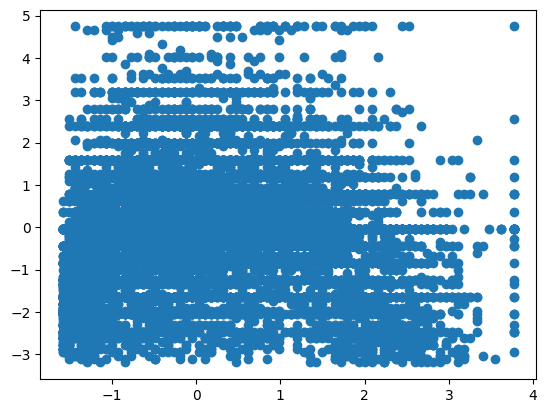

In [ ]:
plt.scatter(X_train['Age'], X_train['Hours-Per-Week'])
plt.show()

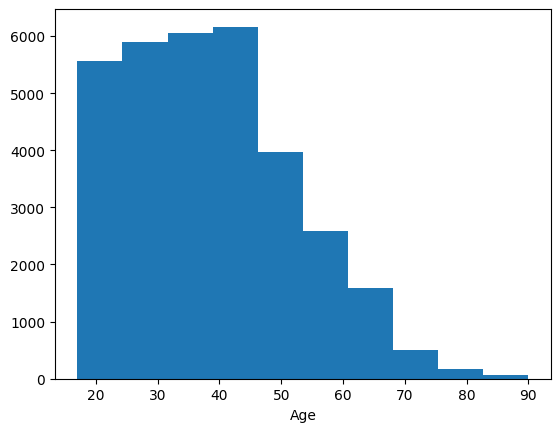

In [ ]:
plt.hist(X_train['Age'])
plt.xlabel('Age')
plt.show()

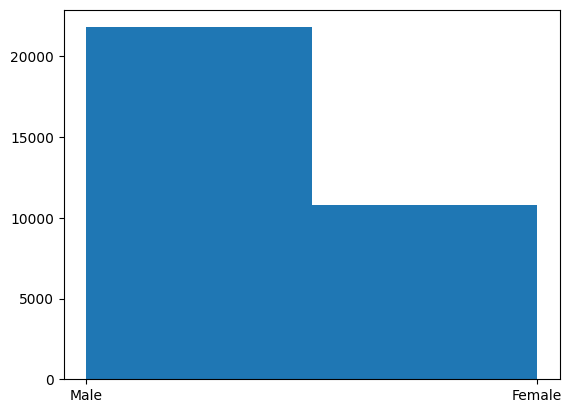

In [ ]:
plt.hist(X_train['Sex'], bins=2)
plt.show()


 در این دو نمودار ابتدا نگاهی کلی بر دیتاست انداخته که میزان رنج سنی شرکت کنندگان و همچنین توزیع جنسیتشان به چه صورت بوده است

## 3-2 Encoding
در این مرحله به انجام  

Encoding  

میپردازیم   
(Label Encoding)

In [108]:
# create a LabelEncoder object
le = LabelEncoder()

# specify the features to encode
features_to_encode = ['Work_Class', 'Education', 'Marital_Status', 'Occupation',
                      'Relationship', 'Race', 'Sex', 'Native_Country']

# loop through each feature and encode it
for feature in features_to_encode:
    X_train[feature] = le.fit_transform(X_train[feature])
X_train.head()

,Age,Work_Class,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5


In [109]:
y_train = le.fit_transform(y_train)
y_train = pd.DataFrame(y_train)
y_train.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


## 3-3 Standard Normalizaion
در این مرحله داده های فیچرهایی مانند سن، ساعت کاری در هفته و ... را نرمال میکنیم.

In [110]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# specify the features to standardize
features_to_standardize = ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week']

# loop through each feature and standardize it
for feature in features_to_standardize:
    X_train[feature] = scaler.fit_transform(X_train[[feature]])
X_train.head()

,Age,Work_Class,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,0.030671,7,9,13,4,1,1,4,1,0.148453,-0.21666,-0.035429,39
1,0.837109,6,9,13,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39
2,-0.042642,4,11,9,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39
3,1.057047,4,1,7,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39
4,-0.775768,4,9,13,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5


# 4- Train Data

## Loading Test Dataset

In [112]:
# Load the dataset
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/Adult_TestDataset.csv")
df_test = df_test.drop('Final_Weight', axis=1)
X_test = df_test.drop("Income", axis=1)
y_test = df_test['Income']

In [113]:
le = LabelEncoder()

# specify the features to encode
features_to_encode = ['Work_Class', 'Education', 'Marital_Status', 'Occupation',
                      'Relationship', 'Race', 'Sex', 'Native_Country']

# loop through each feature and encode it
for feature in features_to_encode:
    X_test[feature] = le.fit_transform(X_test[feature])
X_test.head()

,Age,Work_Class,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,25,4,1,7,4,7,3,2,1,0,0,40,38
1,38,4,11,9,2,5,0,4,1,0,0,50,38
2,28,2,7,12,2,11,0,4,1,0,0,40,38
3,44,4,15,10,2,7,0,2,1,7688,0,40,38
4,18,0,15,10,4,0,3,4,0,0,0,30,38


In [114]:
y_test = le.fit_transform(y_test)
y_test = pd.DataFrame(y_test)
y_test.head()

,0
0,0
1,0
2,1
3,1
4,0


## 4-1 Decison Tree
ابتدا مدل را با درخت تصمیم آموزش میدهیم

In [111]:
# create a DecisionTreeClassifier object
clf_tree = DecisionTreeClassifier()

# fit the model to the training data
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
# create a StandardScaler object
scaler = StandardScaler()

# specify the features to standardize
features_to_standardize = ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week']

# loop through each feature and standardize it
for feature in features_to_standardize:
    X_test[feature] = scaler.fit_transform(X_test[[feature]])
X_test.head()

,Age,Work_Class,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,-0.994129,4,1,7,4,7,3,2,1,-0.142662,-0.218062,-0.031432,38
1,-0.055417,4,11,9,2,5,0,4,1,-0.142662,-0.218062,0.769918,38
2,-0.777503,2,7,12,2,11,0,4,1,-0.142662,-0.218062,-0.031432,38
3,0.377835,4,15,10,2,7,0,2,1,0.871091,-0.218062,-0.031432,38
4,-1.499590,0,15,10,4,0,3,4,0,-0.142662,-0.218062,-0.832781,38


### Evaluate 

In [116]:
# make predictions on the test data
y_pred = clf_tree.predict(X_test)

# evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10957  1478]
 [ 1586  2260]]


In [117]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# create a table to display the evaluation metrics
data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.811805
1   F1-score  0.595992
2  Precision  0.604601
3     Recall  0.587624


همانطور که مشاهده میگردد بر اساس نتیجه خروجی مقدار  کمی دقت دارد و در نهایت اف-1 آن  پایین است و این مدل ارزش و اعتبار کلاس بندی ندارد که میتواند بخاطر عدم پاکسازی داده مناسب یا دیگر عوامل باشد که بعد از فیت کردن مدل های دیگر باید مقایسه انجام گردد و در نهایت اگر دقت هر 3 پایین بود آنگاه دوباره از ابتدا مراحل را انجام داد.

## 4-2 KNN

در این مرحله باید با تعداد همسایه های مختلفی را تست کنیم تا همزمان بیشترین دقت و بیشترین اف - 1 را داشته باشیم 

In [126]:
# create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[11392  1043]
 [ 1651  2195]]


In [127]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# create a table to display the evaluation metrics
data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.834531
1   F1-score  0.619706
2  Precision  0.677888
3     Recall  0.570723


### Evalate

<font size=4> <div dir=rtl> در این مرحله تعداد همسایه های مختلف تست گردید که نتایج خروجی آن به صورت زیر اورده شده است:</div>

  
<center>  

$n = 15 $   

| Metric    | Score     |
|-----------|-----------|
| Accuracy  | 0.834531  |
| F1-score  | 0.619706  |
| Precision | 0.677888  |
| Recall    | 0.570723  |  


---


 $n = 10 $     

| Metric    | Score     |
|-----------|-----------|
| Accuracy  | 0.836189  |
| F1-score  | 0.604713  |
| Precision | 0.703206 |
| Recall    | 0.530421  |  
   

---


   $n = 5 $   

| Metric    | Score     |
|-----------|-----------|
| Accuracy  | 0.827160  |
| F1-score  | 0.612183  |
| Precision | 0.651320  |
| Recall    | 0.577483  |   

---  

   $n = 3$  

| Metric    | Score     |
|-----------|-----------|
| Accuracy  | 0.818377  |
| F1-score  | 0.598070  |
| Precision | 0.626602  |
| Recall    | 0.572023  |

</center> 
<br>
<font size=4> <div dir=rtl> با توجه به حالت های مختلف بهترین مدل برای K=15 
 می‌باشد که به عنوان مدل نهایی انتخاب می‌شود و همچنین دقت و F-1 بیشتری هم نسبت مدل درخت تصمیم دارد.</div>



## 4-3 SVM

### Linear kernel

In [133]:
# Initialize the SVM model with a linear kernel
model = svm.SVC(kernel='linear', C=1, random_state=42)

In [134]:
# Fit the model to the data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=42)

In [135]:
y_pred = model.predict(X_test)
# evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12085   350]
 [ 2708  1138]]


In [136]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# create a table to display the evaluation metrics
data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.812174
1   F1-score  0.426697
2  Precision  0.764785
3     Recall  0.295892


<font size=4>
<div dir=rtl>
همانطور که مشاهده میشود در این مدل هم مقدار دقت تقریبا مناسب و مشابه 
مدل های قبلی میباشد اما اف - 1 آن بسیار پایین است که به علت کم بودن ریکال آن میباشد. قابل ذکر است که در این مدل هایپرپرامترهای دیگر در نظر گرفته نشد و برای تنظیم بهترین هایپرپارامتر مانند گاما و (C) میتوانیم کدی بنویسیم که براساس دقت یا f-1 بهترین را انتخاب نماید و سپس مدل را با آن پارامتر ها فیت کند .</div>

### Polynomial

In [140]:
clf_poly = svm.SVC(kernel='poly', degree=3, gamma='scale', C=1, random_state=42)
clf_poly.fit(X_train, y_train)
y_pred = clf_poly.predict(X_test)
# evaluate the model's performance using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[12097   338]
 [ 2574  1272]]


In [141]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# create a table to display the evaluation metrics
data = {'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
        'Score': [accuracy, f1, precision, recall]}
eval = pd.DataFrame(data)
print(eval)

      Metric     Score
0   Accuracy  0.821141
1   F1-score  0.466276
2  Precision  0.790062
3     Recall  0.330733


<font size=4>
<div dir=rtl>
 یک مدل SVM با استفاده از کلاس SVC با یک هسته polynomial با تنظیم پارامتر کرنل روی 'poly' و پارامتر درجه روی 3  ایجاد می کنیم. همچنین پارامتر گاما را روی 'scale' تنظیم کردیم تا ضریب هسته را به طور خودکار بر اساس داده ها تنظیم کنیم. پارامتر تنظیم C روی 1 تنظیم شده است.
در نهایت ارزیابی بازهم بهبودی در دقت و f-1 score مشاهده نشد و به صورت کلی از مدل KNN ضعیفتر عمل کرد.

# 5- Results

> <font size=4>
<div dir=rtl>
در مقایسه تمامی خروجی ها بین تمام مدل ها نتیجه گیری بر این است که براساس دو معیار 
f-1 score and accuracy
مدل 
KNN with k=15
 بهترین مدل و مناسب ترین است که دقت 83 درصد و اف -1 تقریبا 61 درصد را داراست.
 